<a href="https://colab.research.google.com/github/TiffanyNgai/Sound_synthesis/blob/main/Sound_synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal: synthesize the NBC trademark chimes (nbc_chimes.mp3)

In [ ]:
import math, wave
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sampling_freq = 44100  # Unit: Hz
f_list = [0 , 389, 662, 518]  # Unit: Hz
harmonics_list = [1576, 3573, 1572, 2648, 2097, 4758]  # Two most significant harmonics each section
harmonics_gain = [0.0641, 0.0210, 0.183, 0.283, 0.400, 0.134]  # Gain corresponding to the harmonics
duration = [0.0465, 0.425 - 0.0465, 0.815 - 0.425, 2.548 - 0.815] # Duration per section
t_list = [0.0465, 0.425, 0.815, 2.548]
end_list = []  # No. of sample of the section break
for t in t_list:
  end_list.append(int(t * sampling_freq))

t_arr = np.linspace(0, t_list[-1], int(sampling_freq * t_list[-1]))

# Synthesize the basic three notes
out_wave = np.zeros(end_list[-1])
out_wave[end_list[0]:] = np.sin(2 * np.pi * f_list[1] * t_arr[end_list[0]:])
out_wave[end_list[1]:] = out_wave[end_list[1]:] + np.sin(2 * np.pi * f_list[2] * t_arr[end_list[1]:])
out_wave[end_list[2]:] = out_wave[end_list[2]:] + np.sin(2 * np.pi * f_list[3] * t_arr[end_list[2]:])
out_wave[end_list[1]:end_list[2]] /= 2
out_wave[end_list[2]:end_list[3]] /= 3


# Add harmonics
out_wave[end_list[0]:end_list[1]] += harmonics_gain[0] * np.sin(2 * np.pi * harmonics_list[0] * t_arr[end_list[0]:end_list[1]]) + harmonics_gain[1] * np.sin(2 * np.pi * harmonics_list[1] * t_arr[end_list[0]:end_list[1]])
out_wave[end_list[1]:end_list[2]] += harmonics_gain[2] * np.sin(2 * np.pi * harmonics_list[2] * t_arr[end_list[1]:end_list[2]]) + harmonics_gain[3] * np.sin(2 * np.pi * harmonics_list[3] * t_arr[end_list[1]:end_list[2]])
out_wave[end_list[2]:end_list[3]] += harmonics_gain[4] * np.sin(2 * np.pi * harmonics_list[4] * t_arr[end_list[2]:end_list[3]]) + harmonics_gain[5] * np.sin(2 * np.pi * harmonics_list[5] * t_arr[end_list[2]:end_list[3]])
out_wave = out_wave * 32767 / 1.5  # Scale to 16-bit and scale down by dividing 1.5 to compensate amplitude increase due to addition of harmonics


# Fade out
offset = int(1.2 * sampling_freq)  # No. of sample that fade out starts
fade_out_arr = np.logspace(0, -2, end_list[3] - offset)
out_wave[offset:end_list[3]] = out_wave[offset:end_list[3]] * fade_out_arr

print(f"Timestamps: {end_list}")

Timestamps: [2050, 18742, 35941, 112366]


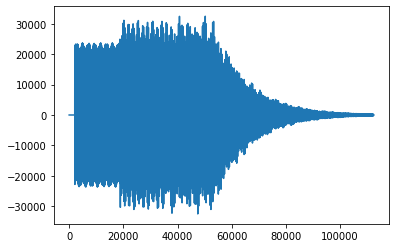

In [ ]:
plt.plot(out_wave)
plt.show()

In [ ]:
# Write output
obj = wave.open('synth_out.wav', 'wb')
obj.setnchannels(1)
obj.setsampwidth(2)
obj.setframerate(sampling_freq)
obj.setnframes(len(out_wave))
output = out_wave.astype('<h')  # Convert to 16-bit little endian int
obj.writeframes(output.tobytes())
obj.close()